In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import glob
import os
import random
import time
from sklearn import preprocessing
from IPython.display import clear_output
from tqdm import tqdm

preffix = '/work/users/mi186veva/'

/work/users/mi186veva/data_preprocessed/raw/2020_06_10_16_35_27_.npz /work/users/mi186veva/data_preprocessed/augmented_l2_norm/2020_06_10_16_35_27_.npz
(108354, 93) (108354, 10, 93)
(2, 92)


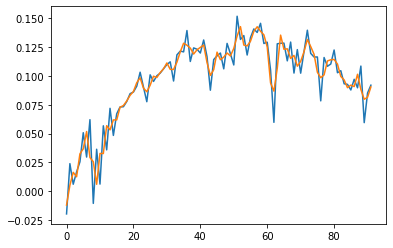

In [17]:
#check if all is okay

paths_raw = glob.glob(os.path.join(preffix, 'data_preprocessed/raw', '2020_06_10_16_35_27_*.npz'))
paths_aug = glob.glob(os.path.join(preffix, 'data_preprocessed/augmented_l2_norm', '2020_06_10_16_35_27_*.npz'))

print(paths_raw[0], paths_aug[0])

raw = np.load(paths_raw[0])
aug = np.load(paths_aug[0])

print(raw['X'].shape, aug['X'].shape)

#plt.plot(raw['X'][0, :-1])
plt.plot(aug['X'][0, 5, :-1])
print(savgol_filter(aug['X'][0, 4:6, :-1], 7, 2).shape)
plt.plot(savgol_filter(aug['X'][0, 5, :-1], 5, 2))
#plt.plot(aug['ill_data'][0][1, :-1])

(92879, 93)
[0.38921547 0.37423608 0.31767035 0.25927648 0.23117489 0.18753387
 0.38103667 0.27976465 0.24752341 0.18925312 0.34611425 0.34509107
 0.22285594 0.50792056 0.20534228 0.32525998 0.33736092 0.2650624
 0.19040234 0.40181613]


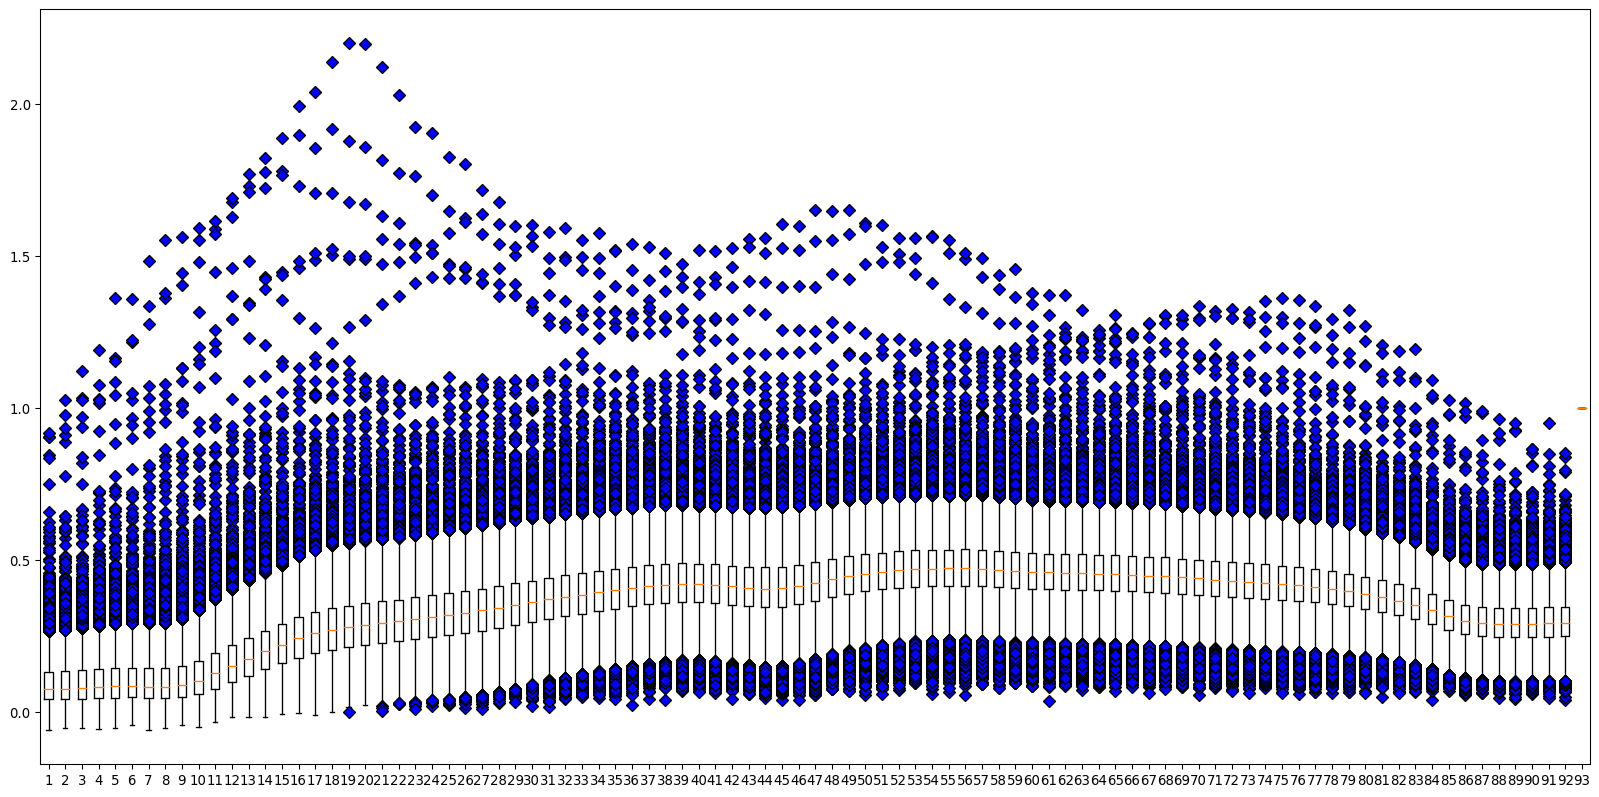

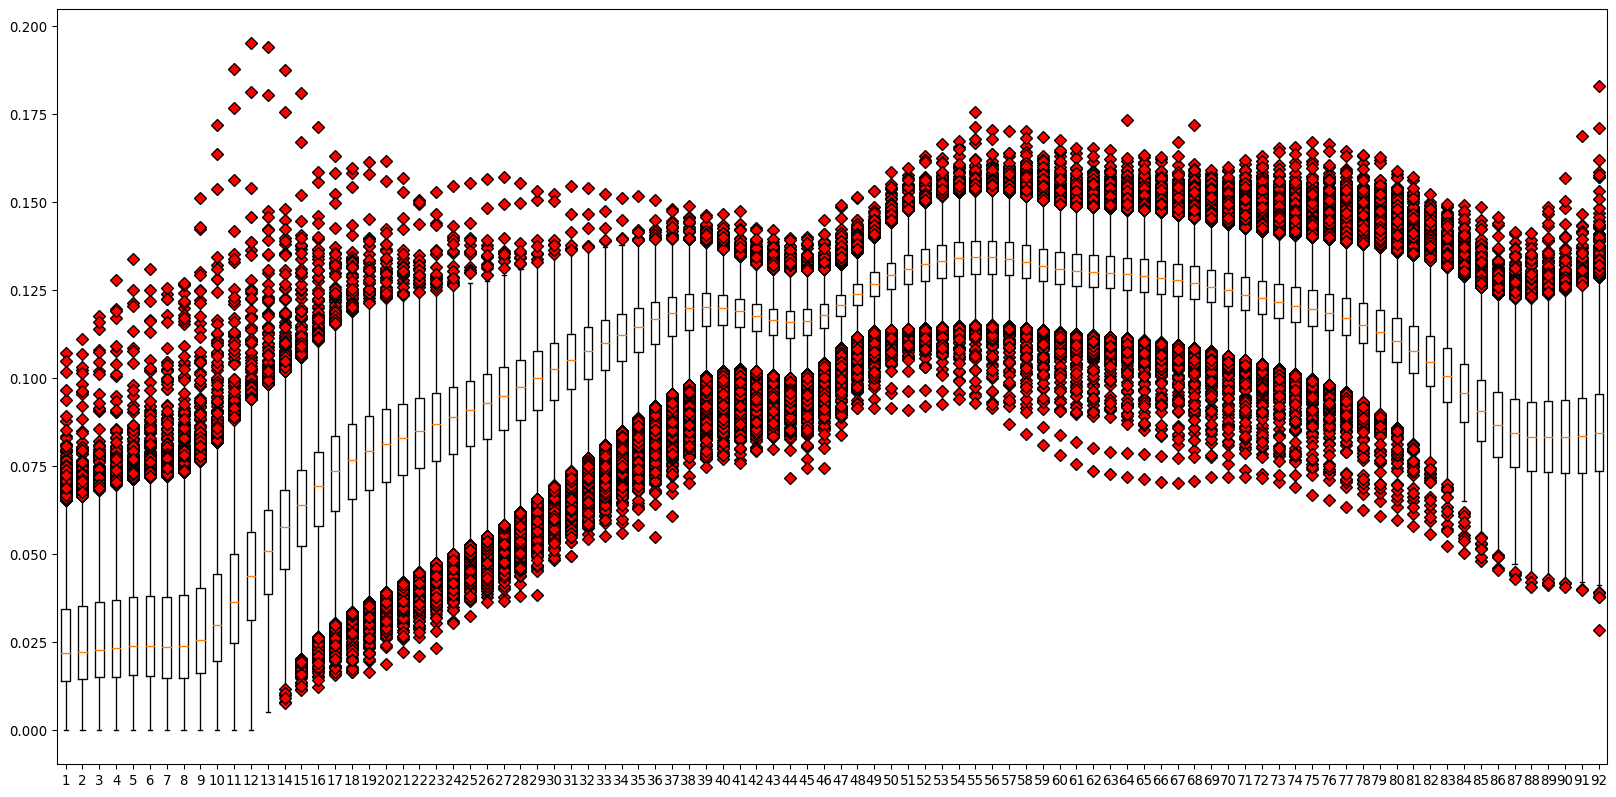

(93900, 93)
[0.2502704  0.28810707 0.22358775 0.24096373 0.26994148 0.27527645
 0.26444665 0.2427446  0.31286624 0.63568807 0.23985282 0.26704118
 0.39985985 0.3558288  0.32130736 0.5124689  0.2737536  0.23731074
 0.4070106  0.31436098]


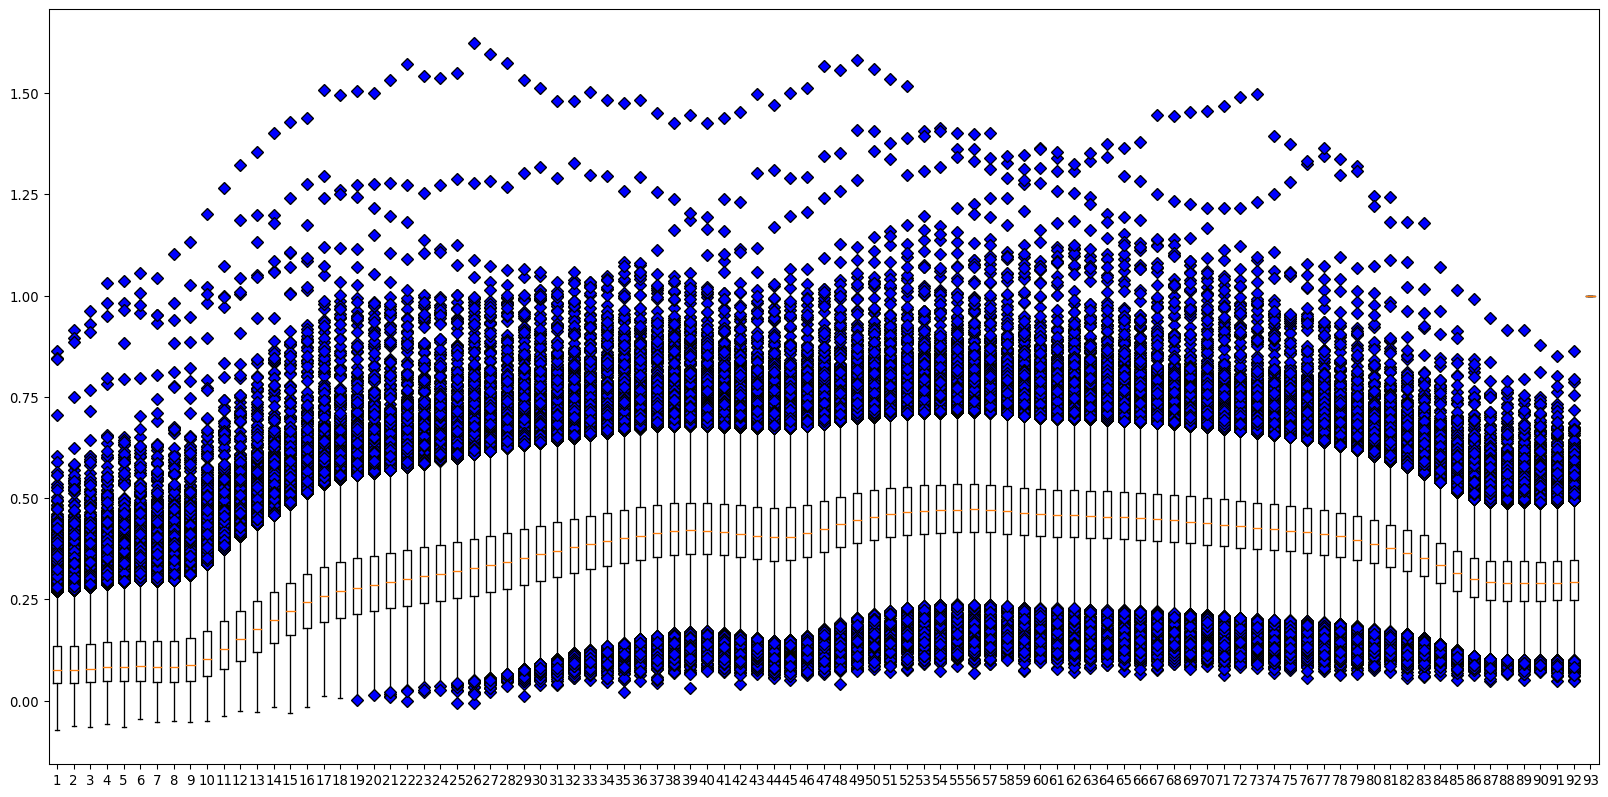

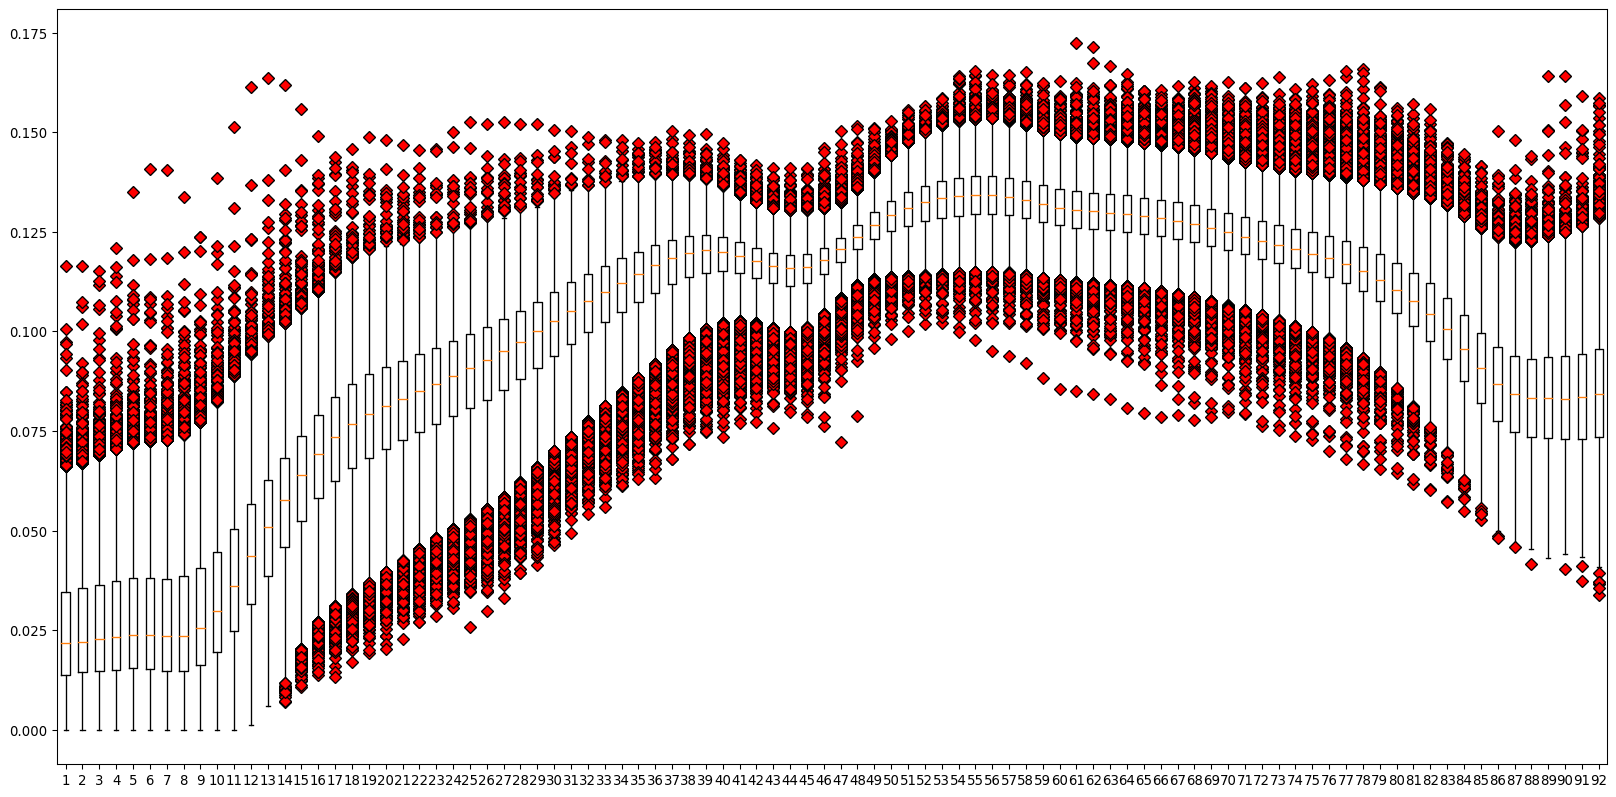

In [12]:
paths_raw = glob.glob(os.path.join(preffix, 'data_preprocessed/combi_with_raw_ill/shuffled', '*.npz'))

for path_raw in paths_raw[:2]:
    raw = np.load(path_raw)

    size = 1000
    my_dpi = 96

    print(raw['X'].shape)
    print(raw['X'][:20, -2])

    ill_indexes = np.flatnonzero(raw['y'] == 1)
    healthy_indexes = np.flatnonzero(raw['y'] == 0)

    plt.figure(figsize=(size* 2/my_dpi, size /my_dpi), dpi=my_dpi)
    red_diamond = dict(markerfacecolor='r', marker='D')
    blue_diamond = dict(markerfacecolor='b', marker='D')
    
    X = raw['X'][:, :-1]
    X[X<0] = 0.
    X[ill_indexes] = savgol_filter(X[ill_indexes], 7, 2)
    X[X<0] = 0.
    
    plt.boxplot(raw['X'][ill_indexes], flierprops=blue_diamond)
    plt.show()
    plt.close()
    
    
    

    plt.figure(figsize=(size* 2/my_dpi, size /my_dpi), dpi=my_dpi)
    plt.boxplot(preprocessing.Normalizer().transform(X[ill_indexes]), flierprops=red_diamond)
    plt.show()
    plt.close()


In [4]:
paths_raw = glob.glob(os.path.join(preffix, 'data_preprocessed/raw', '*.npz'))
paths_aug = glob.glob(os.path.join(preffix, 'data_preprocessed/augmented_l2_norm', '*.npz'))
paths_batches = glob.glob(os.path.join(preffix, 'data_preprocessed/augmented/batch_sized', '*.npz'))

paths_raw = sorted(paths_raw)
paths_aug = sorted(paths_aug)

size = 1000
my_dpi = 96

'''for path_batch in tqdm(paths_batches):
    batch = np.load(path_batch)
    
    num = np.unique(np.nonzero(batch['X'] < 0)[0]).shape[0]
    if num > 0:
        print(f'Warning! {path_batch} has {num} negative numbers')'''
        
for path_raw, path_aug in zip(paths_raw, paths_aug):
    name = path_raw.split('/')[-1].split('.')[0]
    print(name)
    
    raw = np.load(path_raw)
    aug = np.load(path_aug)

    print(path_raw, path_aug)

    ill_indexes_r = np.flatnonzero(raw['y'] == 1)
    healthy_indexes_r = np.flatnonzero(raw['y'] == 0)
    
    ill_indexes_a = np.flatnonzero(aug['y'] == 1)
    
    print(ill_indexes_a.shape[0], ill_indexes_r.shape[0])
    print('aug unique', np.unique(aug['X'][..., -1]))
    print('raw unique', np.unique(raw['X'][..., -1]))
    
    
    if ill_indexes_a.shape[0] != ill_indexes_r.shape[0]:
        print(f'Warning! all_indexes_a != all_indexes_r {ill_indexes_a.shape[0]} vs {ill_indexes_r.shape[0]}')
        
    if ill_indexes_a.shape[0] > 0:

        plt.figure(figsize=(size* 2/my_dpi, size /my_dpi), dpi=my_dpi)
        red_diamond = dict(markerfacecolor='r', marker='D')
        blue_diamond = dict(markerfacecolor='b', marker='D')
        orange_diamond = dict(markerfacecolor='orange', marker='D')
        green_props = dict(color='green')

        #plt.boxplot(raw['X'][healthy_indexes_r], flierprops=blue_diamond)
        aug_ = preprocessing.Normalizer().transform(np.concatenate(aug['X'][ill_indexes_a], axis=0)[:, :-1])
        print(np.min(aug_))
        print(np.min(raw['X']))
        print(np.unique(np.nonzero(aug_ < 0)[0]).shape[0], aug_.shape[0])
        plt.boxplot(aug_, flierprops=orange_diamond, 
                    boxprops=green_props, 
                    medianprops=green_props, 
                    whiskerprops=green_props, 
                    capprops=green_props, 
                    showfliers=False)
        #plt.show()

        #plt.figure(figsize=(size* 2/my_dpi, size /my_dpi), dpi=my_dpi)

        plt.boxplot(preprocessing.Normalizer().transform(raw['X'][ill_indexes_r, :-1]), flierprops=red_diamond, showfliers=False)
        #plt.show()
        
        save_path = 'explore/norm_ill(raw_and_aug)_box_plots_without_outliers/'
        if not os.path.exists(save_path):
            os.mkdir(save_path)
        
        plt.savefig(os.path.join(save_path, name+'.png'))
        plt.close()

100%|██████████| 3098/3098 [00:30<00:00, 101.69it/s]


"for path_raw, path_aug in zip(paths_raw, paths_aug):\n    name = path_raw.split('/')[-1].split('.')[0]\n    print(name)\n    \n    raw = np.load(path_raw)\n    aug = np.load(path_aug)\n\n    print(path_raw, path_aug)\n\n    ill_indexes_r = np.flatnonzero(raw['y'] == 1)\n    healthy_indexes_r = np.flatnonzero(raw['y'] == 0)\n    \n    ill_indexes_a = np.flatnonzero(aug['y'] == 1)\n    \n    print(ill_indexes_a.shape[0], ill_indexes_r.shape[0])\n    print('aug unique', np.unique(aug['X'][..., -1]))\n    print('raw unique', np.unique(raw['X'][..., -1]))\n    \n    \n    if ill_indexes_a.shape[0] != ill_indexes_r.shape[0]:\n        print(f'Warning! all_indexes_a != all_indexes_r {ill_indexes_a.shape[0]} vs {ill_indexes_r.shape[0]}')\n        \n    if ill_indexes_a.shape[0] > 0:\n\n        plt.figure(figsize=(size* 2/my_dpi, size /my_dpi), dpi=my_dpi)\n        red_diamond = dict(markerfacecolor='r', marker='D')\n        blue_diamond = dict(markerfacecolor='b', marker='D')\n        orange_d

In [ ]:
splitted_paths = glob.glob(os.path.join(splitted_npz_path, '*.npz'))
split_factor = int(self.split_factor * len(splitted_paths))

/work/users/mi186veva/data_preprocessed/combi/batch_sized/batch51.npz
[0 0 0 1 0 1 0 0 1 0]
['2019_09_25_19_44_52_' '2020_03_27_16_57_50_' '2020_06_03_13_33_43_'
 '2020_06_10_16_35_27_' '2020_03_27_16_57_50_' '2019_12_11_11_41_04_'
 '2020_02_19_13_03_01_' '2020_04_08_18_05_56_' '2019_12_11_11_41_04_'
 '2020_06_03_13_33_43_']


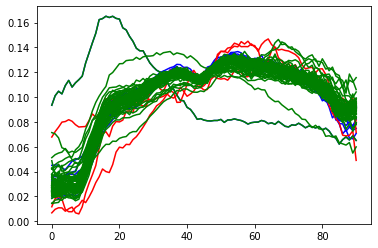

"for i in range(raw['X'].shape[0]):\n    time.sleep(5)\n    clear_output()\n    print(i, raw['y'][i])\n    plt.clf()\n    plt.plot(raw['X'][i, :-1])\n    plt.show()"

In [3]:
#check if all is okay
preffix = '/work/users/mi186veva/'
paths_raw = glob.glob(os.path.join(preffix, 'data_preprocessed/combi/batch_sized', 'batch51.npz'))
#paths_aug = glob.glob(os.path.join(preffix, 'data_preprocessed/augmented', '2020_06_10_16_35_27_*.npz'))

print(paths_raw[0])

raw = np.load(paths_raw[0])
#aug = np.load(paths_aug[0])

#print(raw['X'].shape, aug['X'].shape)
pat_indexes = np.flatnonzero(raw['PatientName'] == '2019_09_25_19_44_52_')
ill_indexes = np.flatnonzero(raw['y'][:10] == 1)
healthy_indexes = np.flatnonzero(raw['y'][:10] == 0)
print(raw['y'][:10])
print(raw['PatientName'][:10])

plt.plot(raw['X'][healthy_indexes, :-1].T, c='b')
plt.plot(raw['X'][ill_indexes, :-1].T, c='r')
plt.plot(raw['X'][pat_indexes, :-1].T, c='g')
plt.show()

'''for i in range(raw['X'].shape[0]):
    time.sleep(5)
    clear_output()
    print(i, raw['y'][i])
    plt.clf()
    plt.plot(raw['X'][i, :-1])
    plt.show()'''
#plt.plot(aug['X'][0, 5, :-1])
#print(savgol_filter(aug['X'][0, 4:6, :-1], 5, 2).shape)
#plt.plot(savgol_filter(aug['X'][0, 6, :-1], 5, 2))
#plt.plot(aug['ill_data'][0][1, :-1])

In [7]:
'проверка не содержат ли батчи excepted_indexes'

import numpy as np
import glob
import os

paths = glob.glob(os.path.join('/work/users/mi186veva/data_preprocessed/augmented/batch_sized/', '*.npz'))
for p in tqdm(paths):
    data = np.load(p)
    X, y, names = data['X'], data['y'], data['PatientName']
    #print(np.unique(names).shape[0])
    
    for except_name in  ['2019_09_04_12_43_40_', '2020_05_28_15_20_27_', '2019_07_12_11_15_49_', '2020_05_15_12_43_58_']:
        indexes = np.flatnonzero(np.core.defchararray.find(names, except_name) != -1)
        if indexes.shape[0] > 0:
            print(f'WARNING! {p} has {except_name} inside')
            break
    
    
    #f = np.where(data['y'] == 2)
    #if len(f[0] != 0):
    #    print('Error on: ', p, len(f[0]))


100%|██████████| 4630/4630 [03:41<00:00, 20.93it/s]


In [2]:
import numpy as np

data = np.load('/work/users/mi186veva/data_preprocessed/augmented/batch_sized/batch9.npz')
print(data['X'].shape, data['y'].shape, data['PatientName'].shape, data['PatientIndex'].shape)

(64, 10, 93) (64,) (64,) (64,)


In [1]:
import glob
import numpy as np

pths = glob.glob('/work/users/mi186veva/data_preprocessed/augmented/shuffled/shuffled9.npz')

summ = 0
for p in pths[:10]:
    data = np.load(p)
    for key, value in data.items():
        print(key)
    print(data['X'].shape, data['y'].shape, data['PatientName'].shape, data['PatientIndex'].shape)
    print(data['PatientName'][-10:])
    summ+=data['X'].shape[0]
    
print(summ)

X
y
PatientName
PatientIndex
(578951, 93) (578951,) (578951,) (578951,)
['2020_03_10_10_15_04_' '2020_01_29_18_12_15_' '2020_05_07_12_52_25_'
 '2020_03_27_16_57_50_' '2020_03_20_15_36_12_' '2020_05_13_19_30_26_'
 '2020_02_19_13_03_01_' '2020_04_08_14_36_59_' '2020_03_27_11_31_09_'
 '2020_06_24_18_00_12_']
578951


In [19]:
d = {
    '1': [1, 2, 3], 
    '2': [2, 3, 4]
}

np.savez('1', **{n: a for n, a in d.items()})

In [20]:
data = np.load('1.npz', allow_pickle=True)
for key, value in data.items():
    print(key)

1
2


In [5]:
f = np.array([1, 2, 3, 4])
indexes = np.arange(2)
print(indexes)

print(f[indexes])

[0 1]
[1 2]


In [11]:
f = np.array(['gg', 'ff', 'ggff'])
ind = np.where('ff' in f)
print(ind)
print(f[ind])

(array([0]),)
['gg']


In [16]:
print(np.flatnonzero(np.core.defchararray.find(f,'ff')!=-1))
print(f[np.flatnonzero(np.core.defchararray.find(f,'ff')!=-1)])

[1 2]
['ff' 'ggff']


In [1]:
import numpy as np


#np.savez('/work/users/mi186veva/data_preprocessed/augmented/shuffled/pile0', X=[], y=[])
data = np.load('/work/users/mi186veva/data_preprocessed/raw/2020_02_13_18_05_51_.npz', allow_pickle=True)

for i, value in enumerate(data.items()):
    print (i, value[0], value[1].shape)
    #print(np.concatenate(value[1], axis=0).shape)
    #print(value[1][0].shape)
    print(value[1][:10])
    print('unique', np.unique(value[1]).shape)

#val = [[1], [2], [3], [4]]
#np.savez('/work/users/mi186veva/data_preprocessed/augmented/shuffled/pile2', **{dic[0]: np.append(dic[1], val[i]) for i, dic in enumerate(data.items())})

#data = np.load('/work/users/mi186veva/data_preprocessed/augmented/shuffled/shuffled0.npz', allow_pickle=True)        

#print(data['X'], data['y'])

0 X (150120, 93)
[[0.20506637 0.18982463 0.1890742  0.20997429 0.21663028 0.20873918
  0.1951929  0.18857494 0.19266385 0.21670802 0.25506306 0.3008222
  0.3317169  0.34725556 0.36987078 0.3884983  0.40948635 0.4160423
  0.41542917 0.4343752  0.43021876 0.43480334 0.44105044 0.43454736
  0.4491678  0.44469044 0.44580254 0.4562189  0.45341608 0.45906785
  0.47141805 0.47837573 0.48031878 0.48569223 0.49745795 0.49099976
  0.5052378  0.51071346 0.506976   0.5033847  0.49927244 0.4839789
  0.48919305 0.47973526 0.48648316 0.4902502  0.50429404 0.5006011
  0.51173586 0.5054576  0.5223238  0.5161142  0.5177627  0.52825356
  0.51120716 0.51771927 0.5195094  0.51999325 0.5163685  0.5078207
  0.5083938  0.5032777  0.50513566 0.50552887 0.49266192 0.47481892
  0.48742673 0.48818251 0.48729962 0.4671076  0.46076742 0.45410472
  0.45191464 0.44651806 0.44348747 0.43451777 0.44884002 0.42964953
  0.4195401  0.41609386 0.4147374  0.4061076  0.39283648 0.38603592
  0.3798454  0.35006008 0.33536553 0

In [54]:
lst = []
lst += [[1, 2, 3], [3, 4, 5]]
print(lst)

np.append([], [[1, 2, 3], [3, 4, 5]], axis=0)



[[1, 2, 3], [3, 4, 5]]


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)

In [2]:
import numpy as np

data = np.load('/work/users/mi186veva/data_preprocessed/augmented/shuffled/shuffled21.npz')

X = data['X'][:5]
y = data['y'][:5]

print(X.shape)
print(y)

y = [ [_y_] * X.shape[1] for _y_ in y]
X = np.concatenate(X, axis=0)
y = np.concatenate(y, axis=0)

print(X.shape)
print(y)
print(y.shape)


(5, 10, 93)
[0 2 0 0 0]
(50, 93)
[0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
(50,)


In [17]:
import pickle

p={1:2}
q={3:4}

#data =  {n: a for n, a in data.items()}
#filename="untitled.txt"
#with open(filename, 'ab') as fp:
#    pickle.dump(data,fp)
    


#To load from pickle file
result = []
with open('/work/users/mi186veva/data_preprocessed/augmented/shuffled/91.pile', 'rb') as fr:
    try:
        while True:
            result.append(pickle.load(fr))
    except EOFError:
        pass

result = np.array(result)
#
print(result.shape)

for i in result[0]:
    print(np.array(i).shape)
#print(result[0])

k = {}

for key in result[0].keys():
    k[key] = [f[key] for f in result]
    k[key] = np.concatenate(k[key], axis=0)
    print(k[key].shape)




(5,)
()
()
()
()
(57827, 93)
(57827,)
(57827,)
(57827,)


In [32]:
open('.pile', 'a').close()

In [2]:
import numpy as np

arr = np.array([1, 2, 3])
print(arr[:0], arr[:])

[] [1 2 3]
